In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Kütüphane Kurulumları

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

## Veri kümesini oluşturmak ve ayırmak

In [3]:
(x_train, _),(x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

In [6]:
print("Eğitim : ",x_train.shape)
print("Test : ",x_test.shape)

Eğitim :  (60000, 28, 28, 1)
Test :  (10000, 28, 28, 1)


## Veriye Gürültü Ekleme Adımı

In [7]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Gürültülü Veriyi Görselleştirme

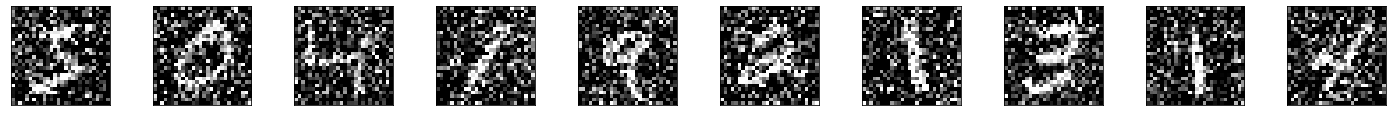

gürültülü orijinal görüntüler


In [9]:
%matplotlib inline

n = 10

plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
print("gürültülü orijinal görüntüler")

## ENCODE Modeli

In [19]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)

x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)

# (7,7,32)

## DECODE Modeli

In [20]:
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)

x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

## Modelin Derlenmesi Eğitilmesi

In [21]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

In [30]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy,x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1416 - val_loss: 0.1401
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1414 - val_loss: 0.1398
Epoch 3/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1412 - val_loss: 0.1396
Epoch 4/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1409 - val_loss: 0.1394
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1407 - val_loss: 0.1392
Epoch 6/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1405 - val_loss: 0.1390
Epoch 7/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1403 - val_loss: 0.1388
Epoch 8/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1401 - val_loss: 0.1386
Epoch 9/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1399 - val_loss: 0.1383
Epoch 10/100
469/469 [==============================] - 7s 15ms/step - loss: 0.139

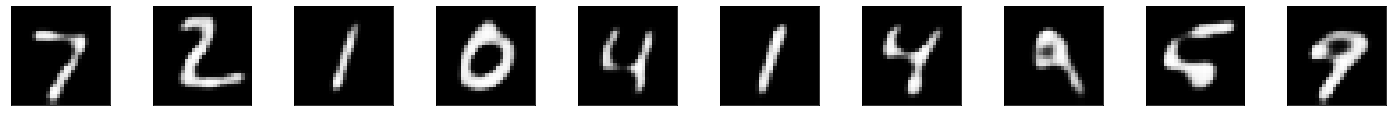

DENOISED - GÜRÜLTÜSÜ BASTIRILMIŞ GÖRÜNTÜLER


In [31]:
%matplotlib inline

n = 10

plt.figure(figsize = (25,4))

for i in range(n):
  # Yeniden yapılandırmayı ekranda göster
  ax = plt.subplot(2, n, i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
print("DENOISED - GÜRÜLTÜSÜ BASTIRILMIŞ GÖRÜNTÜLER")